In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

There are 9 red cars!


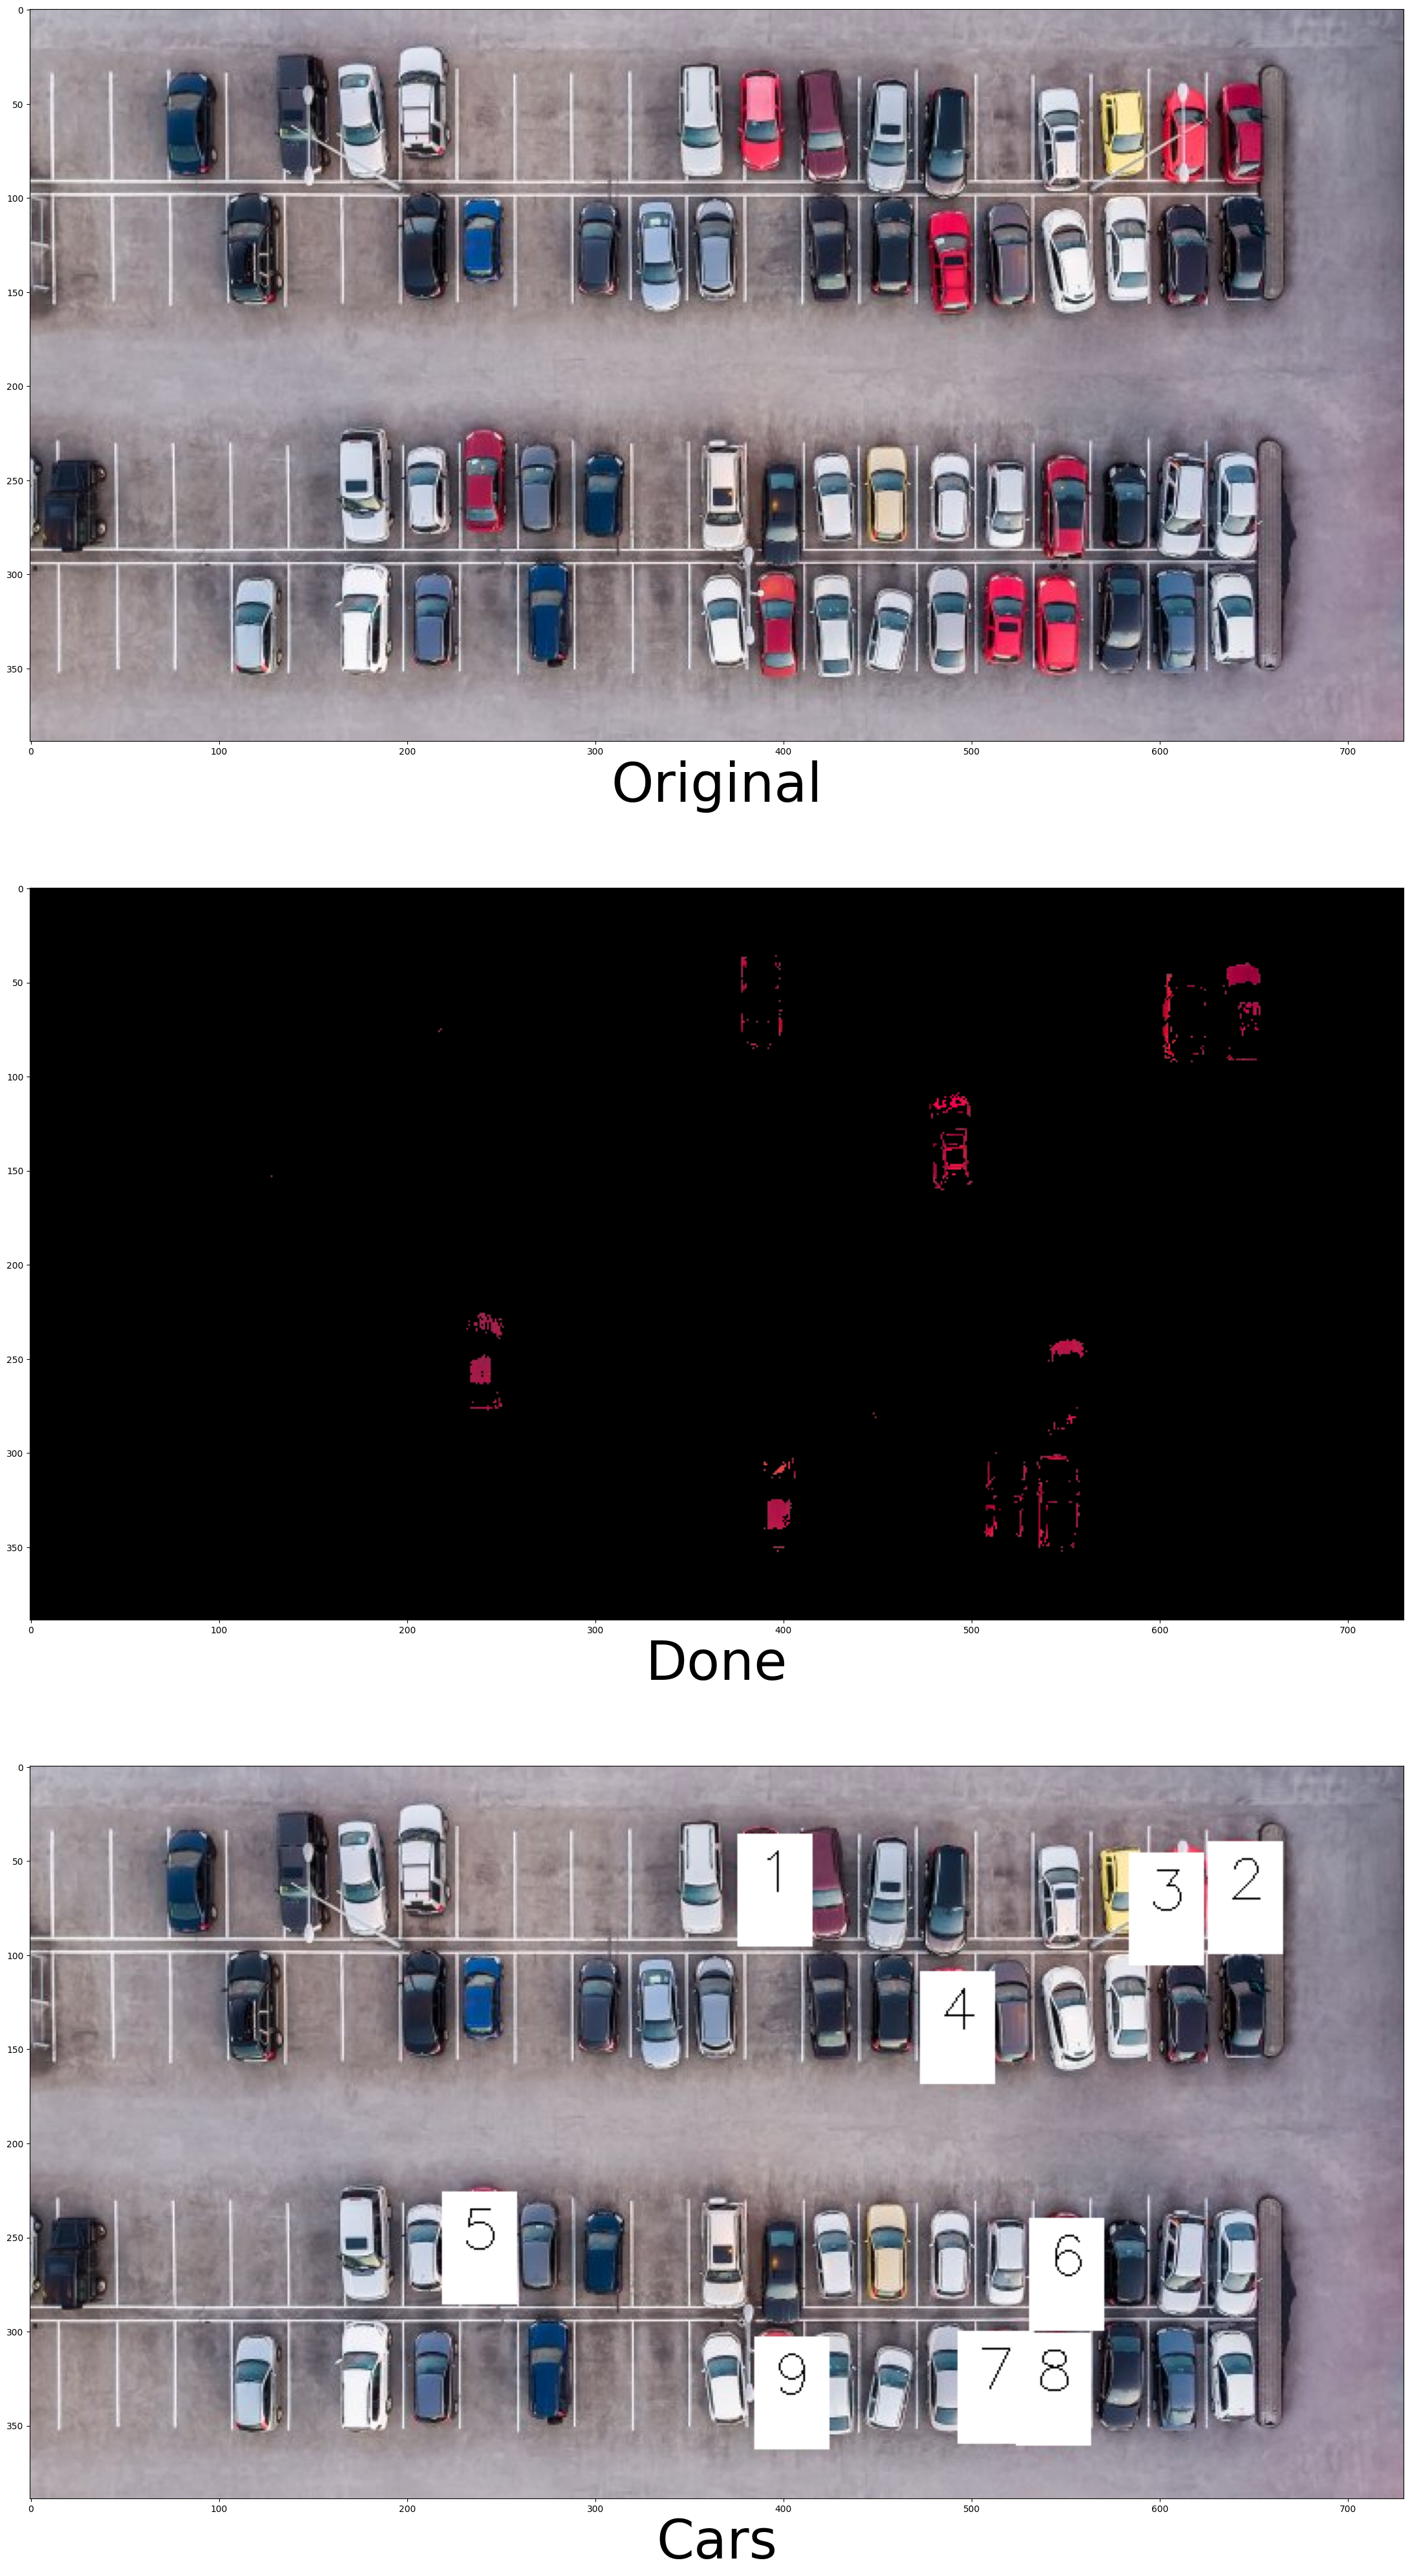

True

In [2]:
image = cv2.imread("image.jpg")
im = image.copy()
out = im.copy()

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])



plt.figure(figsize=(40,50))
plt.subplot(311)
plt.xlabel('Original', fontsize= 60)
plt.ylabel('')
plt.imshow(rgb_img)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        b,g,r = im[i,j]
        if r > 130 and g < 80 and b < 80:
            im[i,j] = b,g,r
        else:
            im[i,j] = 0,0,0


b,g,r = cv2.split(im)
rgb_img2 = cv2.merge([r,g,b])

plt.subplot(312)
plt.xlabel('Done', fontsize= 60)
plt.ylabel('')

plt.imshow(rgb_img2)

matching = 0
counter = 0
car = 1

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        b,g,r = im[i,j]
        b2,g2,r2 = image[i,j]
        if b == b2 and g == g2 and r == r2:
            mask1 = im[i:i+60, j-20:j+20, :]
            mask2 = image[i:i+60, j-20:j+20, :]
            for q in range(mask1.shape[0]):
                for w in range(mask1.shape[1]):
                    b,g,r = mask1[q,w]
                    b2,g2,r2 = mask2[q,w]
                    if b == b2 and g == g2 and r == r2:
                        matching = matching + 1
        if matching > 50:
            counter = counter + 1
            im[i:i+60, j-20:j+20] = 0, 1,2
            out[i:i+60, j-20:j+20] = 255,255,255
            cv2.putText(out,str(car), (j-10, i+30), cv2.FONT_ITALIC,1,(0,0,0))
            car = car + 1
        matching = 0


plt.subplot(313)
plt.xlabel('Cars', fontsize= 60)
plt.ylabel('')

b,g,r = cv2.split(out)
outi = cv2.merge([r,g,b])
plt.imshow(outi)

print("There are " + str(counter) + " red cars!")
plt.show()
cv2.imwrite("Done.jpg", out)